In [1]:
import numpy as np
import random
from numpy import linalg as LA
import networkx as nx
import matplotlib.pyplot as plt
import math

In [2]:
def comunication_vecindades_iguales(n,e=1,imprimir=False):
    G=nx.random_regular_graph(e,n)
    M=nx.convert_matrix.to_numpy_array(G)
    grados=[]
    A=G.degree()
    for a in A:
        grados.append(a[1])
    if imprimir == True:
        nx.draw(G,with_labels=True)
        print("Media grado nodos: "+str(np.mean(grados)))
        print("Std grado nodos: "+str(np.std(grados)))
    return M

def comunication_vecindades_distintas(n,p=0.5,imprimir=False):
    G=nx.fast_gnp_random_graph(n,p)
    M=nx.convert_matrix.to_numpy_array(G)
    grados=[]
    A=G.degree()
    for a in A:
        grados.append(a[1])
    if imprimir == True:
        nx.draw(G,with_labels=True)
        print("Media grado nodos: "+str(np.mean(grados)))
        print("Std grado nodos: "+str(np.std(grados)))
    return M


def get_pesos(M,alpha,lamda):
    nodos=M.shape[0]
    pesos=np.zeros_like(M)
    for fila in range(nodos):
        vecinos=sum(M[fila])+1
        for columna in range(nodos):
            if M[fila][columna] == 1:
                pesos[fila][columna] = 1.0*alpha*lamda/vecinos
        pesos[fila][fila] = alpha*(1.0*lamda/vecinos-1)
    return pesos

def influencia_miedo(xi,xj,mu,nu):
    if xi < xj:
        return nu
    else:
        return mu


def get_pesos_miedo(M,alpha,lamda,mu,nu,x):
    nodos=M.shape[0]
    pesos=np.zeros_like(M)
    for fila in range(nodos):
        columna=np.where(M[fila]==1)[0][0]
        psi=influencia_miedo(x[fila],x[columna],mu,nu)
        pesos[fila][fila]=alpha*(lamda-lamda*psi-1)
        pesos[fila][columna]=alpha*(lamda*psi)
    return pesos

def matriz_variable(n,tiempo,alpha,lamda,mu,nu):
    x_0=np.random.rand(n)
    X=np.zeros((n,tiempo))
    X[:,0]=x_0
    for t in range(tiempo-1):
        M=comunication_vecindades_iguales(n)
        P=get_pesos_miedo(M,alpha,lamda,mu,nu,X[:,t])
        val, vec = LA.eig(P)
        coef=np.linalg.solve(vec, X[:,t])
        X[:,t+1]=np.dot(vec,coef*np.exp(val))
    return X

Media grado nodos: 5.0
Std grado nodos: 0.0


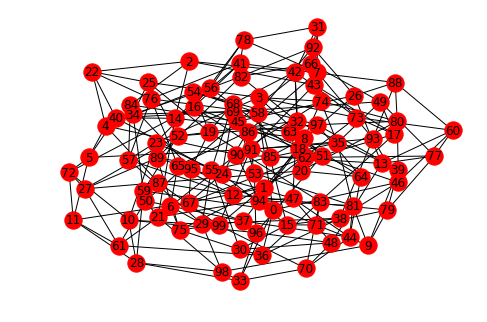

In [26]:
M=comunication_vecindades_iguales(100,5,True)
#M
P=get_pesos(M,0.1,0.8)
x_0=np.random.rand(P.shape[0])
val, vec = LA.eig(P)
coef=np.linalg.solve(vec, x_0)

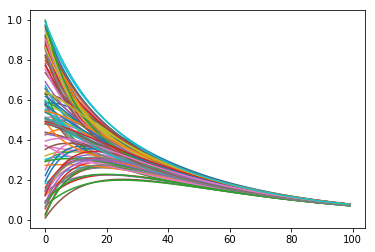

In [27]:
for nodo in range(len(x_0)):
    solucion=np.zeros(100)
    for i in range(len(solucion)):
        solucion[i]=np.dot(coef*np.exp(i*val),vec[nodo])
    plt.plot(solucion)

Media grado nodos: 2.44
Std grado nodos: 1.3879481258317978


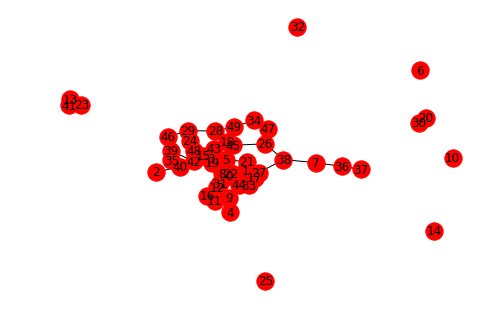

In [33]:
M=comunication_vecindades_distintas(50,0.05,True)
P=get_pesos(M,0.1,1)
x_0=np.random.rand(P.shape[0])
val, vec = LA.eig(P)
coef=np.linalg.solve(vec, x_0)

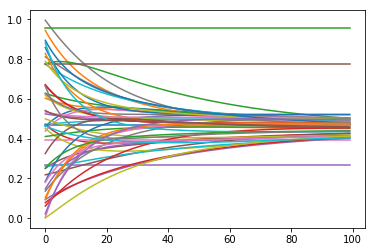

In [34]:
for nodo in range(len(x_0)):
    solucion=np.zeros(100)
    for i in range(len(solucion)):
        solucion[i]=np.dot(coef*np.exp(i*val),vec[nodo])
    plt.plot(solucion)

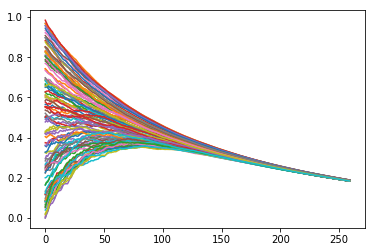

In [47]:
X=matriz_variable(n=100,tiempo=260,alpha=0.05,lamda=0.9,mu=0.2,nu=0.6)
plt.plot(X.T)
plt.show()